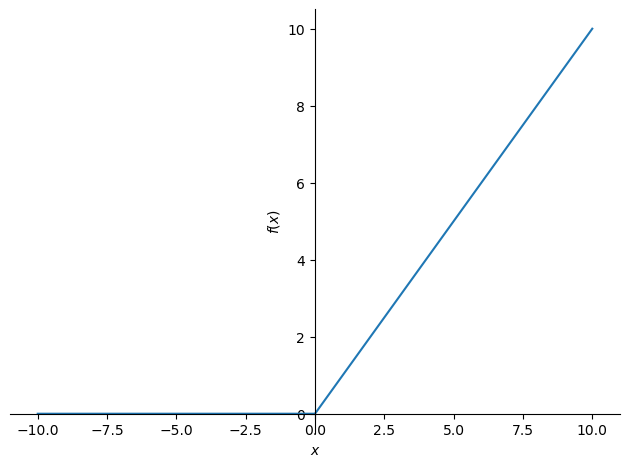

In [1]:
from sympy import *

x = symbols('x')
relu = Max(0, x)
plot(relu)

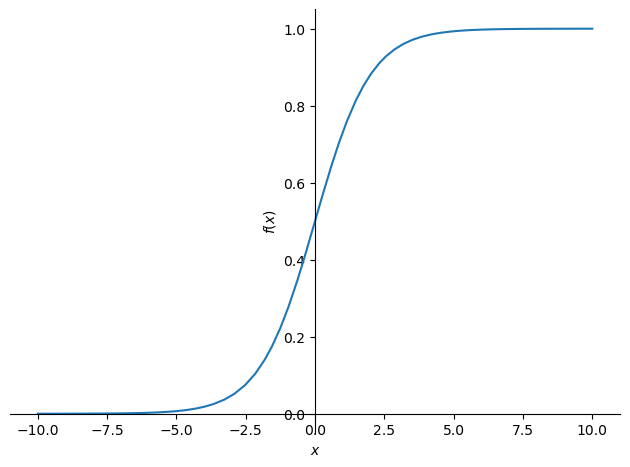

In [2]:
from sympy import *

x = symbols('x')
logistic = 1 / (1 + exp(-x))
plot(logistic)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1 / 3)
n = X_train.shape[0]

w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))


def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2


test_predictions = forward_prop(X_test.transpose())[3]
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("정확도: ", accuracy)

정확도:  0.6636971046770584


In [4]:
from sympy import *

Z2 = symbols('Z2')

logistic = lambda x: 1 / (1 + exp(-x))

A2 = logistic(Z2)
dA2_dZ2 = diff(A2, Z2)
print(dA2_dZ2)

exp(-Z2)/(1 + exp(-Z2))**2


In [5]:
from sympy import *

A1, W2, B2 = symbols('A1, W2, B2')

Z2 = A1 * W2 + B2
dZ2_dW2 = diff(Z2, W2)
print(dZ2_dW2)

A1


In [6]:
from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

C = (A2 - Y) ** 2
dC_dA2 = diff(C, A2)
print("dC_dA2 = ", dC_dA2)

logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2)

_Z2 = A1 * W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 = ", dZ2_dA1)

dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 = ", dZ2_dW2)

dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 = ", dZ2_dB2)

relu = lambda x: Max(x, 0)
_A1 = relu(Z1)

d_relu = lambda x: x > 0
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1)

_Z1 = X * W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print("dZ1_dW1 = ", dZ1_dW1)

dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 = ", dZ1_dB1)

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

L = 0.05

all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1 / 3)
n = X_train.shape[0]

w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))


def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2


d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2


def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1
    return dC_dW1, dC_dB1, dC_dW2, dC_dB2


for i in range(100_000):
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    Z1, A1, Z2, A2 = forward_prop(X_sample)

    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

test_predictions = forward_prop(X_test.transpose())[3]
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("정확도: ", accuracy)

정확도:  0.9910913140311729


In [8]:
def predict_probability(r, g, b):
    X = np.array([[r, g, b]]).transpose() / 255
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2


def predict_font_shade(r, g, b):
    output_values = predict_probability(r, g, b)
    if output_values > .5:
        return "DARK"
    else:
        return "LIGHT"


col_input = input("밝은 글꼴과 어두운 글꼴을 예측합니다. R,G,B를 입력하세요: ")
(r, g, b) = col_input.split(",")
print(predict_font_shade(int(r), int(g), int(b)))

DARK


In [9]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 / 3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3,),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

print("훈련 세트 점수: %f" % nn.score(X_train, Y_train))
print("테스트 세트 점수: %f" % nn.score(X_test, Y_test))

print("오차 행렬:")
matrix = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(matrix)

훈련 세트 점수: 0.527778
테스트 세트 점수: 0.555556
오차 행렬:
[[10  0]
 [ 8  0]]
